In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:

import seaborn as sns

In [3]:
obesity = pd.read_csv("./obesity-cleaned.csv").dropna()

In [4]:
obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [5]:
obesity.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [6]:
obesity.shape

(24570, 5)

In [7]:
obesity.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

## Problem Domain: Choose 3 countries and compare obesity trends across years for both males and females

In [8]:
obesity['obese'] = obesity.apply(lambda g: g['Obesity (%)'].split(" ")[0], axis =1)
obesity.head()

usa = obesity[obesity["Country"]=='United States of America']
usa = usa[usa["Sex"]== 'Both sexes']
usa = usa[usa["Year"]>=2000]
usa['obese_col'] = usa.apply(lambda g:float(g['obese']), axis =1)
usa.head()

japan = obesity[obesity["Country"]=='Japan']
japan = japan[japan["Sex"]== 'Both sexes']
japan = japan[japan["Year"]>= 2000]
japan['obese_col'] = japan.apply(lambda g:float(g['obese']), axis =1)
japan.head()

canada = obesity[obesity["Country"]=='Canada']
canada = canada[canada["Sex"]== 'Both sexes']
canada = canada[canada["Year"]>= 2000]
canada['obese_col'] = canada.apply(lambda g:float(g['obese']), axis =1)
canada.head()

frames = [usa,japan, canada]
frames = pd.concat(frames)

In [9]:
sns.set()

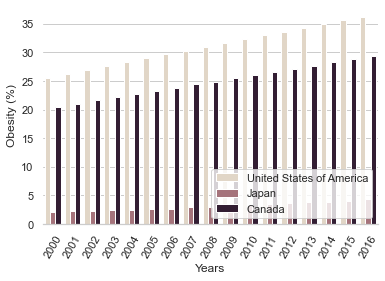

In [14]:
obesity_plot = sns.barplot(x="Year", y="obese_col", hue = "Country", data=frames, palette="ch:.25")
plt.xticks(rotation=60)
obesity_plot.set(xlabel='Years', ylabel='Obesity (%)')

sns.set_style("whitegrid")
sns.despine(left=True)
sns.axes_style({'font.family': ['Times']})
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 3.5})
plt.legend(loc='lower right')
plt.show()

This is graph comparing the obesity percentage trends in three countries - Japan, USA and Canada in the last 20 years. 
1. The graph shows that all three countries show a positive trend over time.
2. The highest levels of obesity are in USA, while the lowest absolute levels have been in Japan
3. Japan has the least change in obesity levels from 2000 compare to USA and Canada

### In summary, USA has shown the greatest rate of increase in obesity between Canada and Japan.  USA also has the highest rates of obesity.  In contrast, Japan has the lowest rates of obesity, and lower rate of rise than Canada and USA.